In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply

In [2]:
df = pd.read_csv('tft_outputs/data/daf/data_file_drift_fixed.csv')

In [3]:
df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95]).transpose()

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
DAYOFWEEK,7248413.0,3.070422,1.571954,0.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000e+00
HOUROFDAY,7248413.0,10.753275,5.040275,0.000000,3.000000,5.000000,7.000000,10.000000,14.000000,18.000000,20.000000,2.300000e+01
GROSS_WEIGHT,7248413.0,25941.454956,12075.684179,3200.000000,9257.142857,12933.333333,16560.000000,22695.652174,35466.666667,44266.666667,47371.428571,8.833488e+04
TRIP_DISTANCE,7248413.0,99049.085318,90134.566548,10001.000000,12986.000000,16339.000000,29555.000000,66311.000000,141812.000000,241146.000000,297275.000000,2.026610e+06
POS_ALTITUDE,7248413.0,390.258885,531.357761,0.000000,22.000000,35.000000,80.000000,211.000000,535.000000,1022.000000,1340.000000,1.884880e+05
NEG_ALTITUDE,7248413.0,384.352579,529.365139,0.000000,23.000000,36.000000,80.000000,207.000000,525.000000,1007.000000,1324.000000,1.884750e+05
ALTITUDE_DELTA,7248413.0,-0.021007,143.447686,-2508.000000,-203.000000,-120.000000,-37.000000,0.000000,37.000000,120.000000,203.000000,2.215000e+03
USED_FUEL_COMP,7248413.0,28336.973139,26571.728733,-594077.000000,3810.000000,4930.000000,8630.000000,18575.000000,39883.000000,68327.000000,84876.000000,8.532140e+05
USED_FUEL,7248413.0,28336.973139,26571.728733,-594077.000000,3810.000000,4930.000000,8630.000000,18575.000000,39883.000000,68327.000000,84876.000000,8.532140e+05
IDLE_FUEL,7248413.0,490.403836,2396.876950,0.000000,21.000000,34.000000,85.000000,192.000000,421.000000,906.000000,1596.000000,7.805900e+05


In [4]:
df = df[df['USED_FUEL'] > 0] # We remove negative fuel consumptions

In [5]:
df_spec = pd.read_csv('trucks_commercial_name.csv')

In [6]:
df = df.merge(df_spec, how='left', on=['TRUCK_SERIES', 'TRUCK_TYPE', 'AXLE_CONF', 'COMMERCIAL_NAME','TRUCK_ENGINE'])

In [7]:
df = df[(df['GROSS_WEIGHT'] >= df['MIN_WEIGHT']) & (df['GROSS_WEIGHT'] <= df['MAX_WEIGHT'])]

In [8]:
df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95]).transpose()

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
DAYOFWEEK,6469905.0,3.068959,1.574936,0.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000e+00
HOUROFDAY,6469905.0,10.821578,5.107518,0.000000,3.000000,5.000000,7.000000,11.000000,14.000000,18.000000,20.000000,2.300000e+01
GROSS_WEIGHT,6469905.0,26453.900385,10751.066887,5600.000000,13500.000000,14900.000000,17466.666667,23520.000000,35169.230769,43350.000000,45894.736842,6.000000e+04
TRIP_DISTANCE,6469905.0,103355.588403,91234.645992,10001.000000,13464.000000,17338.000000,32111.000000,71501.000000,148869.000000,247331.000000,301442.000000,2.026610e+06
POS_ALTITUDE,6469905.0,405.394013,542.712780,0.000000,23.000000,37.000000,84.000000,225.000000,563.000000,1052.000000,1367.000000,1.884880e+05
NEG_ALTITUDE,6469905.0,399.339519,540.420497,0.000000,24.000000,38.000000,84.000000,221.000000,553.000000,1037.000000,1350.000000,1.884750e+05
ALTITUDE_DELTA,6469905.0,-0.170339,147.046874,-2508.000000,-210.000000,-125.000000,-39.000000,0.000000,39.000000,124.000000,210.000000,2.215000e+03
USED_FUEL_COMP,6469905.0,29488.045881,26517.471528,1.000000,4323.000000,5525.000000,9555.000000,20058.000000,41611.000000,69514.000000,85411.000000,8.532140e+05
USED_FUEL,6469905.0,29488.045881,26517.471528,1.000000,4323.000000,5525.000000,9555.000000,20058.000000,41611.000000,69514.000000,85411.000000,8.532140e+05
IDLE_FUEL,6469905.0,488.765520,2459.371367,0.000000,25.000000,41.000000,92.000000,202.000000,428.000000,892.000000,1529.000000,7.805900e+05


In [9]:
df = df[df['CC_FUEL'] >= 0]

In [10]:
df_aux = pd.read_csv('tft_outputs/data/daf/tf_input.csv')

In [11]:
df_out = df[df_aux.columns]

In [12]:
df_out.to_csv('tft_outputs/data/daf/tf_input.csv', index=False)

In [27]:
import pandas as pd

columns = ['GROSS_WEIGHT','TRIP_DISTANCE','ALTITUDE_DELTA','USED_FUEL','FUEL_CONSUMPTION','CC_DIST','CC_ENABLED','BRAKEDURATION', 'TIME_STEPS', 'DPA_SCORE']

train_df = pd.read_csv('tft_outputs/data/daf/splits/tf_input_train.csv', parse_dates=['START_DATETIME','END_DATETIME'])
val_df = pd.read_csv('tft_outputs/data/daf/splits/tf_input_valid.csv', parse_dates=['START_DATETIME','END_DATETIME'])
test_df = pd.read_csv('tft_outputs/data/daf/splits/tf_input_test.csv', parse_dates=['START_DATETIME','END_DATETIME'])

train_df = train_df[columns]
val_df = val_df[columns]
test_df = test_df[columns]



In [28]:
from libs.window import WindowGenerator
w1 = WindowGenerator(input_width=14, label_width=1, shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['DPA_SCORE'])
w1

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [14]
Label column name(s): ['DPA_SCORE']

In [29]:
import tensorflow as tf
import numpy as np

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 15, 10)
Inputs shape: (3, 14, 10)
labels shape: (3, 1, 1)


In [30]:
w1.example = example_inputs, example_labels

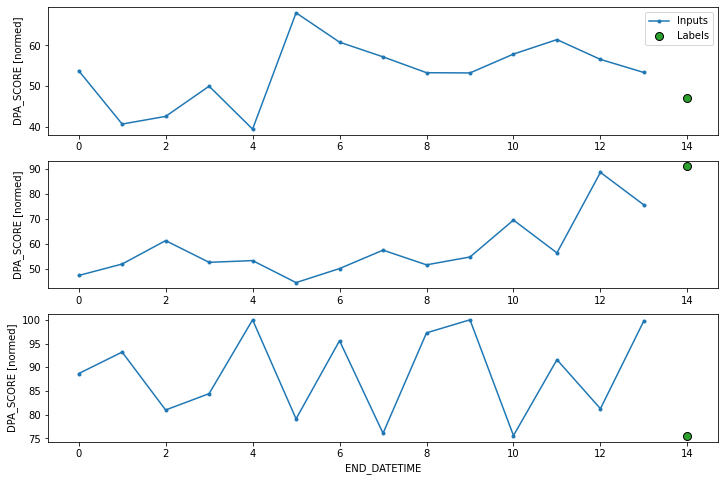

In [31]:
w1.plot()